# EyepadAlign

A class to align face images based on the location of eyes.

> from mlxtend.image import EyepadAlign

## Overview

The `EyepadAlign` class aligns a face image to target face landmarks based on the location of the eyes. The facial landmarks are detected using `extract_face_landmarks` which is based on dlib's face landmark detection code (http://dlib.net/face_landmark_detection_ex.cpp.html):



### References

- Kazemi, Vahid, and Josephine Sullivan. "One millisecond face alignment with an ensemble of regression trees." Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2014.

## Example 1 

Target image shape:  (218, 178, 3)
Original Image shape:  (512, 512, 3)
Transformed Image shape:  (218, 178, 3)


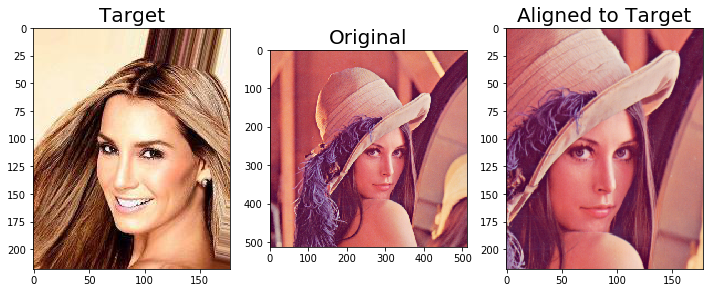

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
from mlxtend.image import EyepadAlign


eyepad = EyepadAlign()
target_image = imageio.imread('celeba-subset/000001.jpg')
print('Target image shape: ', target_image.shape)
eyepad.fit(target_image)

img = imageio.imread('lena.png')
print('Original Image shape: ', img.shape)
img_tr = eyepad.transform(img)
print('Transformed Image shape: ', img_tr.shape)

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(target_image)
ax.set_title('Target', size=20)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(img)
ax.set_title('Original', size=20)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_tr)
ax.set_title('Aligned to Target', size=20)
plt.show()

The transform method aligns the original image to the target.

## Example 2

Fitting the average facial landmarks for 9 face images 


/scratch/mirjalil/anaconda3/envs/pytorch/lib/python3.5/site-packages/mlxtend-0.15.0.dev0-py3.5.egg/mlxtend/image/extract_face_landmarks.py:61: UserWarning: No face detected.
  warnings.warn('No face detected.')


Transformed Image shape:  (218, 178, 3)


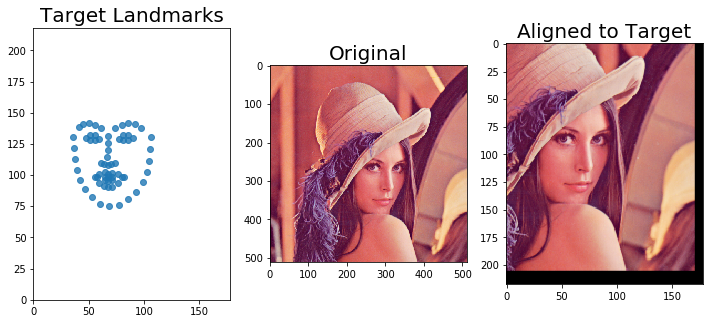

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
from mlxtend.image import EyepadAlign


eyepad = EyepadAlign()
eyepad.fit(target_img_dir='celeba-subset/', file_extensions='.jpg')

img = imageio.imread('lena.png')
img_tr = eyepad.transform(img)
print('Transformed Image shape: ', img_tr.shape)

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(eyepad.target_landmarks[:, 0], 218-eyepad.target_landmarks[:, 1], alpha=0.8)
ax.set_title('Target Landmarks', size=20)
ax.set_xlim(0, 178)
ax.set_ylim(0, 218)
ax = fig.add_subplot(1, 3, 2)
ax.imshow(img)
ax.set_title('Original', size=20)
ax = fig.add_subplot(1, 3, 3)
ax.imshow(img_tr)
ax.set_title('Aligned to Target', size=20)
plt.show()

## API

In [3]:
with open('../../api_modules/mlxtend.image/EyepadAlign.md', 'r') as f:
    print(f.read())

## EyepadAlign

*EyepadAlign(target_landmarks=None, image_width=None, image_height=None)*

Class to align/transform face images to target landmarks,
based on the location of the eyes.

1. Scaling factor is computed based on distance between the
left and right eyes, so that the transformed image will
have the same eye distance as target.

2. Transformation is performed based on the eyes' middle point.

3. Finally, the transformed image is padded with zeros to match
the desired final image size.

### Methods

<hr>

*cal_eye_properties(landmarks)*

None

<hr>

*fit(target_image=None, target_img_dir=None, file_extensions='.jpg')*

Fits the target landmarks points:
a. if target_image is given, sets the target landmarks
to the landmarks of target image.
b. otherwise, if a target directory is given,
calculates the average landmarks for all face images
in the directory which will be set as the target landmark.

<hr>

*transform(img)*

None


